In [2]:
import os
import sys
import numpy as np

# append specific path to tilseg (working repository)
sys.path.append("/Users/stanleycho/TILseg_Project2024")

from tilseg.seg import KMeans_superpatch_fit, segment_TILs
from tilseg.similarity import image_similarity, superpatch_similarity

ModuleNotFoundError: No module named 'tilseg'

In [2]:
# specify reference patch path
reference_patch = '/Users/stanleycho/slides_folder/reference_patch/reference_patch.tif'

# directory of any output folder, does not matter because no files are being saved
output_path = '/Users/stanleycho/slides_folder'

In [1]:
# obtain cluster mask on reference patch, fitting model on itself
_, _, cluster_mask_dict_reference = segment_TILs(reference_patch,
                                                 output_path,  
                                                 hyperparameter_dict={'n_clusters': 4}, 
                                                 model=None,
                                                 algorithm='KMeans',
                                                 save_TILs_overlay=False,
                                                 save_cluster_masks=False,
                                                 save_all_clusters_img=False,
                                                 save_csv=False,
                                                 multiple_images=False)

# convert cluster mask dictionary from reference patch to array
reference_array = next(iter(cluster_mask_dict_reference.values()))

NameError: name 'segment_TILs' is not defined

Mean squared error for superpatch superpatch15.tif: 0.215


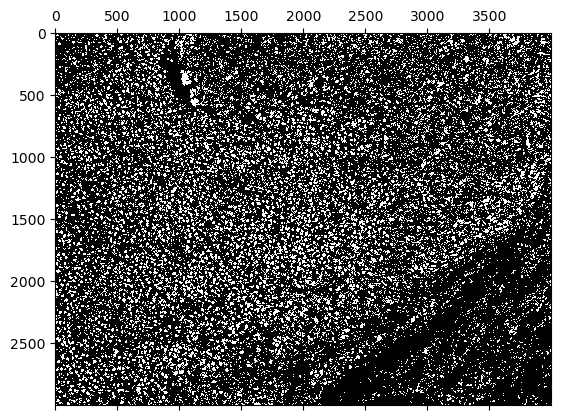

Mean squared error for superpatch superpatch9.tif: 0.242


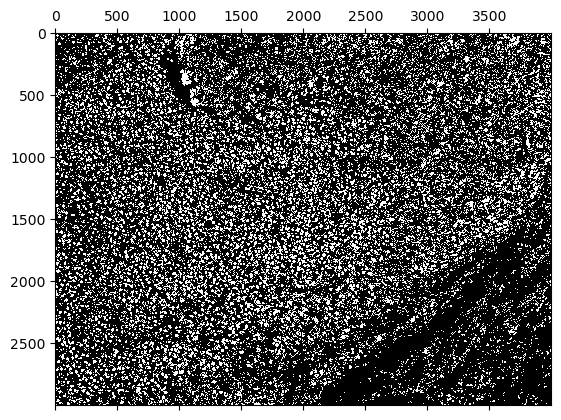

Mean squared error for superpatch superpatch8.tif: 0.223


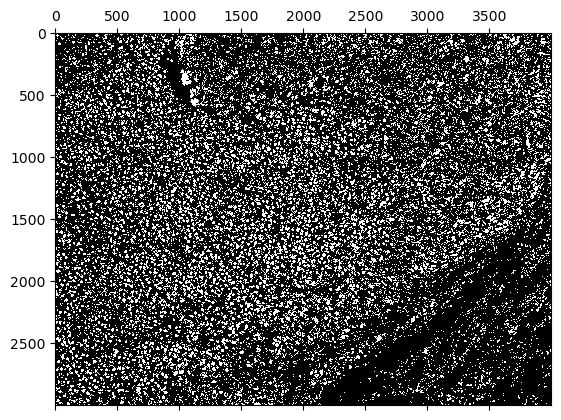

Mean squared error for superpatch superpatch16.tif: 0.246


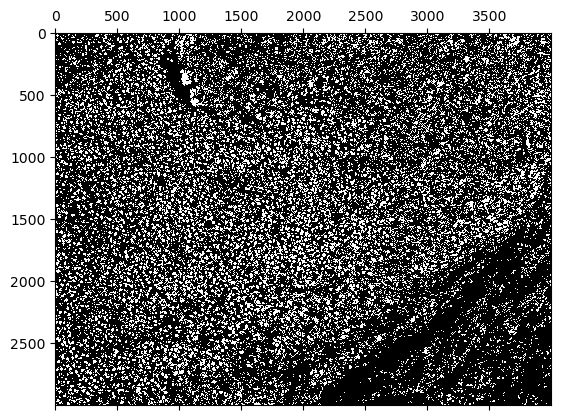

Please use an image that can be opened by PIL.Image.open


UnidentifiedImageError: cannot identify image file '/Users/stanleycho/Downloads/superpatches/.DS_Store'

In [5]:
# compute mean squared error and generates image difference for each superpatch in folder 
# for a superpatch tiff ~200mb, model fitting and segmentation takes ~1-3 minutes
superpatch_folder = '/Users/stanleycho/Downloads/superpatches'
superpatch_similarity(superpatch_folder, reference_patch, output_path, reference_array)